### Ridwan Halim
### erbyl14@gmail.com
### github: ridwaanhall
### huggingface: ridwaanhall

# First of All

## Install

In [1]:
!pip install emoji
!pip install Sastrawi
!pip install wordcloud
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00


## Import

In [1]:
import pandas as pd
import re
import string
import emoji
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import csv
import requests
from io import StringIO
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# from transformers import pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, LSTM, SpatialDropout1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## Download

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Load CSV file

In [ ]:
url = "https://raw.githubusercontent.com/ridwaanhall/dicoding-ml-intermediate/main/com.tokopedia.tkpd_id_id_15000.csv"
raw_df = pd.read_csv(url)
raw_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,be5049bf-bff4-4ca9-a644-f932c60bfdac,wali moersil,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya pelanggan baru. Awalnya sebagai pelanggan...,1,503,3.269.0,2024-06-29 16:15:31,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-06-29 16:53:01,3.269.0
1,e12f03c2-6334-4f44-9a4c-7660e57f6c7f,Serasi Official Store,https://play-lh.googleusercontent.com/a/ACg8oc...,saya turunkan bintangnya. Karena kualitas menu...,2,74,3.269.0,2024-07-10 01:30:20,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-10 01:53:02,3.269.0
2,72c4fcd8-b336-44de-b1b5-b3c056dc5881,Nicholas Zhang,https://play-lh.googleusercontent.com/a/ACg8oc...,Lebih baik belanja di shopee. Ada masalah cepa...,1,13,3.269.0,2024-07-18 05:21:18,"Halo Toppers, terima kasih atas rating yang ka...",2024-07-18 05:40:02,3.269.0
3,c0c8effc-fbb1-4795-ba1d-040a4ca73083,MM MM,https://play-lh.googleusercontent.com/a-/ALV-U...,Kekurangan setelah update: 1. Slide Display pr...,2,46,3.269.0,2024-07-06 10:46:46,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-06 11:13:03,3.269.0
4,4faf8ed9-b698-41f6-af83-10b939acd2a1,Ikarifin Siregar,https://play-lh.googleusercontent.com/a/ACg8oc...,MENGECEWAKAN TOPED YG SEKARANG. Saya menggunak...,1,93,3.271.0,2024-07-11 01:23:56,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-07-11 01:53:01,3.271.0


# Data Cleaning

## Drop Duplicates and NAN

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  12195 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          12668 non-null  object
 9   repliedAt             12668 non-null  object
 10  appVersion            12195 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [ ]:
drop_duplicates_na_raw_df = raw_df.drop_duplicates()
drop_duplicates_na_raw_df = drop_duplicates_na_raw_df.dropna()
content_tokopedia = drop_duplicates_na_raw_df[['content']]
content_tokopedia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10762 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10762 non-null  object
dtypes: object(1)
memory usage: 168.2+ KB


In [ ]:
content_tokopedia_no_dupl_na = content_tokopedia.copy()
content_tokopedia_no_dupl_na = content_tokopedia_no_dupl_na.drop_duplicates()
content_tokopedia_no_dupl_na = content_tokopedia_no_dupl_na.dropna()
content_tokopedia_no_dupl_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10757 entries, 0 to 14994
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10757 non-null  object
dtypes: object(1)
memory usage: 168.1+ KB


In [ ]:
content_tokopedia_no_dupl_na.head()

,content
0,Saya pelanggan baru. Awalnya sebagai pelanggan...
1,saya turunkan bintangnya. Karena kualitas menu...
2,Lebih baik belanja di shopee. Ada masalah cepa...
3,Kekurangan setelah update: 1. Slide Display pr...
4,MENGECEWAKAN TOPED YG SEKARANG. Saya menggunak...


## Cleaning Data

In [ ]:
content_tokopedia_no_dupl_na_copy = content_tokopedia_no_dupl_na.copy()
content_tokopedia_no_dupl_na_copy.head()

,content
0,Saya pelanggan baru. Awalnya sebagai pelanggan...
1,saya turunkan bintangnya. Karena kualitas menu...
2,Lebih baik belanja di shopee. Ada masalah cepa...
3,Kekurangan setelah update: 1. Slide Display pr...
4,MENGECEWAKAN TOPED YG SEKARANG. Saya menggunak...


### Cleaning Data

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text_lexicon(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # remove hashtags
    text = re.sub(r'RT[\s]', '', text)  # remove retweets
    text = re.sub(r"http\S+", '', text)  # remove links
    text = re.sub(r'[0-9]+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove special characters

    text = emoji.replace_emoji(text, '')  # remove emojis

    emoticons_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)')
    text = re.sub(emoticons_pattern, '', text)  # remove emoticons

    text = text.replace('\n', ' ')  # replace new lines with spaces
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove all punctuations
    text = text.strip()  # remove spaces from both ends
    return text

def casefold_text_lexicon(text):
    return text.lower()

def tokenize_text_lexicon(text):
    return word_tokenize(text)

def filter_text_lexicon(tokens):
    stop_words = set(stopwords.words('indonesian')).union(stopwords.words('english'))
    custom_stopwords = {'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'}
    stop_words.update(custom_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]

def stem_text_lexicon(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def to_sentence(words):
    return ' '.join(words)

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
content_tokopedia_no_dupl_na_copy['text_clean'] = content_tokopedia_no_dupl_na_copy['content'].apply(clean_text_lexicon)

content_tokopedia_no_dupl_na_copy['text_casefoldingText'] = content_tokopedia_no_dupl_na_copy['text_clean'].apply(casefold_text_lexicon)

content_tokopedia_no_dupl_na_copy['text_slangwords'] = content_tokopedia_no_dupl_na_copy['text_casefoldingText'].apply(fix_slangwords)

content_tokopedia_no_dupl_na_copy['text_tokenizingText'] = content_tokopedia_no_dupl_na_copy['text_slangwords'].apply(tokenize_text_lexicon)

content_tokopedia_no_dupl_na_copy['text_stopword'] = content_tokopedia_no_dupl_na_copy['text_tokenizingText'].apply(filter_text_lexicon)

content_tokopedia_no_dupl_na_copy['text_akhir'] = content_tokopedia_no_dupl_na_copy['text_stopword'].apply(to_sentence)

In [ ]:
content_tokopedia_no_dupl_na_copy

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Saya pelanggan baru. Awalnya sebagai pelanggan...,Saya pelanggan baru Awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,"[saya, pelanggan, baru, awalnya, sebagai, pela...","[pelanggan, pelanggan, promo, hemat, menggiurk...",pelanggan pelanggan promo hemat menggiurkan ba...
1,saya turunkan bintangnya. Karena kualitas menu...,saya turunkan bintangnya Karena kualitas menur...,saya turunkan bintangnya karena kualitas menur...,saya turunkan bintangnya karena kualitas menur...,"[saya, turunkan, bintangnya, karena, kualitas,...","[turunkan, bintangnya, kualitas, menurunpada, ...",turunkan bintangnya kualitas menurunpada photo...
2,Lebih baik belanja di shopee. Ada masalah cepa...,Lebih baik belanja di shopee Ada masalah cepat...,lebih baik belanja di shopee ada masalah cepat...,lebih baik belanja di shopee ada masalah cepat...,"[lebih, baik, belanja, di, shopee, ada, masala...","[belanja, shopee, cepat, selesai, bahaya, bela...",belanja shopee cepat selesai bahaya belanja to...
3,Kekurangan setelah update: 1. Slide Display pr...,Kekurangan setelah update Slide Display produ...,kekurangan setelah update slide display produ...,kekurangan setelah update slide display produk...,"[kekurangan, setelah, update, slide, display, ...","[kekurangan, update, slide, display, produk, a...",kekurangan update slide display produk auto ge...
4,MENGECEWAKAN TOPED YG SEKARANG. Saya menggunak...,MENGECEWAKAN TOPED YG SEKARANG Saya menggunaka...,mengecewakan toped yg sekarang saya menggunaka...,mengecewakan toped yang sekarang saya mengguna...,"[mengecewakan, toped, yang, sekarang, saya, me...","[mengecewakan, toped, tokopedia, kesini, pengi...",mengecewakan toped tokopedia kesini pengiriman...
...,...,...,...,...,...,...,...
14987,"Saya pelanggan tokopedia dari thn 2015,, tapi ...",Saya pelanggan tokopedia dari thn tapi makin ...,saya pelanggan tokopedia dari thn tapi makin ...,saya pelanggan tokopedia dari tahun tapi makin...,"[saya, pelanggan, tokopedia, dari, tahun, tapi...","[pelanggan, tokopedia, kesini, tokped, datar, ...",pelanggan tokopedia kesini tokped datar peruba...
14989,akuu dapet diskon yang gede banget! thanks Tok...,akuu dapet diskon yang gede banget thanks Toko...,akuu dapet diskon yang gede banget thanks toko...,akuu dapat diskon yang gede banget terima kasi...,"[akuu, dapat, diskon, yang, gede, banget, teri...","[akuu, diskon, gede, banget, terima, kasih, to...",akuu diskon gede banget terima kasih tokopedia...
14990,Tolong buat tokopedia hilangkan expedisi anter...,Tolong buat tokopedia hilangkan expedisi anter...,tolong buat tokopedia hilangkan expedisi anter...,tolong buat tokopedia hilangkan expedisi anter...,"[tolong, buat, tokopedia, hilangkan, expedisi,...","[tolong, tokopedia, hilangkan, expedisi, anter...",tolong tokopedia hilangkan expedisi anteraja e...
14992,"Beli barang, tapi pake potongan harga dan grat...",Beli barang tapi pake potongan harga dan grati...,beli barang tapi pake potongan harga dan grati...,beli barang tapi pakai potongan harga dan grat...,"[beli, barang, tapi, pakai, potongan, harga, d...","[beli, barang, pakai, potongan, harga, gratis,...",beli barang pakai potongan harga gratis ongkos...


In [ ]:
clean_content_tokopedia_no_dupl_na_copy = content_tokopedia_no_dupl_na_copy.dropna(subset=['text_akhir'])
clean_content_tokopedia_no_dupl_na_copy = clean_content_tokopedia_no_dupl_na_copy.drop_duplicates(subset=['text_akhir'])
clean_content_tokopedia_no_dupl_na_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10717 entries, 0 to 14994
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               10717 non-null  object
 1   text_clean            10717 non-null  object
 2   text_casefoldingText  10717 non-null  object
 3   text_slangwords       10717 non-null  object
 4   text_tokenizingText   10717 non-null  object
 5   text_stopword         10717 non-null  object
 6   text_akhir            10717 non-null  object
dtypes: object(7)
memory usage: 669.8+ KB


In [ ]:
clean_content_tokopedia_no_dupl_na_copy.to_csv('clean_content_tokopedia_no_dupl_na_copy.csv', index=False)

In [ ]:
clean_content_tokopedia_no_dupl_na_copy.head(2)

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Saya pelanggan baru. Awalnya sebagai pelanggan...,Saya pelanggan baru Awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,"[saya, pelanggan, baru, awalnya, sebagai, pela...","[pelanggan, pelanggan, promo, hemat, menggiurk...",pelanggan pelanggan promo hemat menggiurkan ba...
1,saya turunkan bintangnya. Karena kualitas menu...,saya turunkan bintangnya Karena kualitas menur...,saya turunkan bintangnya karena kualitas menur...,saya turunkan bintangnya karena kualitas menur...,"[saya, turunkan, bintangnya, karena, kualitas,...","[turunkan, bintangnya, kualitas, menurunpada, ...",turunkan bintangnya kualitas menurunpada photo...


# Data Labeling

## Lexicon

### Fetch Lexicon

In [ ]:
def fetch_lexicon(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        reader = csv.reader(StringIO(response.text), delimiter=',')
        lexicon = {row[0]: int(row[1]) for row in reader}
        return lexicon
    except requests.RequestException as e:
        print(f"Failed to fetch lexicon data: {e}")
        return {}

url_positive = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'
url_negative = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'

lexicon_positive = fetch_lexicon(url_positive)
lexicon_negative = fetch_lexicon(url_negative)

if lexicon_positive:
    print("Positive lexicon data fetched successfully.")
else:
    print("Failed to fetch positive lexicon data.")

if lexicon_negative:
    print("Negative lexicon data fetched successfully.")
else:
    print("Failed to fetch negative lexicon data.")

Positive lexicon data fetched successfully.
Negative lexicon data fetched successfully.


### positive neutran negative

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
clean_content_tokopedia_no_dupl_na_copy_lexicon = clean_content_tokopedia_no_dupl_na_copy.copy()

results = clean_content_tokopedia_no_dupl_na_copy_lexicon['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_content_tokopedia_no_dupl_na_copy_lexicon['polarity_score'] = results[0]
clean_content_tokopedia_no_dupl_na_copy_lexicon['polarity'] = results[1]
print(clean_content_tokopedia_no_dupl_na_copy_lexicon['polarity'].value_counts())

polarity
negative    5432
positive    4661
neutral      624
Name: count, dtype: int64


### Upsampling

In [ ]:
clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced = clean_content_tokopedia_no_dupl_na_copy_lexicon.copy()

balanced_dataframes = []
for label in clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced["polarity"].unique():
    class_df = clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced[clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced["polarity"] == label]
    max_count = clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced["polarity"].value_counts().max()
    if len(class_df) < max_count:
        class_df = resample(class_df, replace=True, n_samples=max_count, random_state=42)
    balanced_dataframes.append(class_df)

clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced = pd.concat(balanced_dataframes)
clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced["polarity"].value_counts()

polarity
positive    5432
negative    5432
neutral     5432
Name: count, dtype: int64

In [ ]:
clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced.to_csv('clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced.csv', index=False)

### Stat

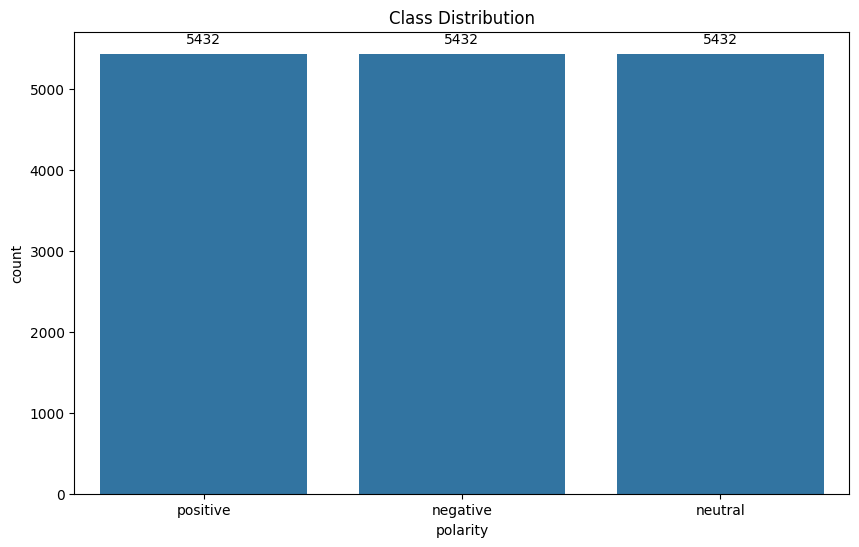

In [ ]:
def plot_class_distribution(data, column, title):
    plt.figure(figsize=(10, 6))

    class_dist_plot = sns.countplot(x=column, data=data)
    plt.title(title)

    for p in class_dist_plot.patches:
        height = p.get_height()
        class_dist_plot.annotate(
            format(height, '.0f'),
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='center',
            xytext=(0, 10),
            textcoords='offset points'
        )

    plt.show()

plot_class_distribution(clean_content_tokopedia_no_dupl_na_copy_lexicon_balanced, 'polarity', 'Class Distribution')

## Indonesia Sentiment from HF

In [ ]:
clean_text_slangwords_no_dupl_na_copy_indo_sentiment = pd.read_csv('clean_content_tokopedia_no_dupl_na_copy.csv')
clean_text_slangwords_no_dupl_na_copy_indo_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10717 entries, 0 to 10716
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               10717 non-null  object
 1   text_clean            10717 non-null  object
 2   text_casefoldingText  10717 non-null  object
 3   text_slangwords       10717 non-null  object
 4   text_tokenizingText   10717 non-null  object
 5   text_stopword         10717 non-null  object
 6   text_akhir            10716 non-null  object
dtypes: object(7)
memory usage: 586.2+ KB


In [ ]:
clean_text_slangwords_no_dupl_na_copy_indo_sentiment.head()

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Saya pelanggan baru. Awalnya sebagai pelanggan...,Saya pelanggan baru Awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,saya pelanggan baru awalnya sebagai pelanggan ...,"['saya', 'pelanggan', 'baru', 'awalnya', 'seba...","['pelanggan', 'pelanggan', 'promo', 'hemat', '...",pelanggan pelanggan promo hemat menggiurkan ba...
1,saya turunkan bintangnya. Karena kualitas menu...,saya turunkan bintangnya Karena kualitas menur...,saya turunkan bintangnya karena kualitas menur...,saya turunkan bintangnya karena kualitas menur...,"['saya', 'turunkan', 'bintangnya', 'karena', '...","['turunkan', 'bintangnya', 'kualitas', 'menuru...",turunkan bintangnya kualitas menurunpada photo...
2,Lebih baik belanja di shopee. Ada masalah cepa...,Lebih baik belanja di shopee Ada masalah cepat...,lebih baik belanja di shopee ada masalah cepat...,lebih baik belanja di shopee ada masalah cepat...,"['lebih', 'baik', 'belanja', 'di', 'shopee', '...","['belanja', 'shopee', 'cepat', 'selesai', 'bah...",belanja shopee cepat selesai bahaya belanja to...
3,Kekurangan setelah update: 1. Slide Display pr...,Kekurangan setelah update Slide Display produ...,kekurangan setelah update slide display produ...,kekurangan setelah update slide display produk...,"['kekurangan', 'setelah', 'update', 'slide', '...","['kekurangan', 'update', 'slide', 'display', '...",kekurangan update slide display produk auto ge...
4,MENGECEWAKAN TOPED YG SEKARANG. Saya menggunak...,MENGECEWAKAN TOPED YG SEKARANG Saya menggunaka...,mengecewakan toped yg sekarang saya menggunaka...,mengecewakan toped yang sekarang saya mengguna...,"['mengecewakan', 'toped', 'yang', 'sekarang', ...","['mengecewakan', 'toped', 'tokopedia', 'kesini...",mengecewakan toped tokopedia kesini pengiriman...


### Load Indonesia Sentiment

In [ ]:
pipe = pipeline("text-classification", model="ridwaanhall/sentimen")

### Sample

In [ ]:
sample = clean_text_slangwords_no_dupl_na_copy_indo_sentiment[:5].values.T[3].tolist()

In [ ]:
sample

['saya pelanggan baru awalnya sebagai pelanggan baru promo hemat nya sangat menggiurkan dengan banyaknya promo hemat yang besar tetapi sewaktu order untuk pertama kali nya ternyata order dibatalkan oleh sistem dengan alasan yang tidak jelas begitu coba diulang lagi untuk bertransaksi ternyata semua berubah dan promo hemat yang semula besar berubah menjadi kecil atau bahkan hilang sangatsangat kecewa sekali jadi seperti dibohongi',
 'saya turunkan bintangnya karena kualitas menurunpada photo barang deskripsi jadi scroll sendiri otomatis jadi kalau mau fokus zoom susah sekaliharus pandai menghentikan photo lalu zoom dengan jari sungguh merepotkan percuma makin canggih kalau bikin susah',
 'lebih baik belanja di shopee ada masalah cepat selesai bahaya belanja di tokopedia bukti unboxing sudah jelas masih saja bela penjual semoga tidak ada yang kena sama seperti saya sudah beli barang pecah ajukan retur refund dipersulit walaupun bukti sudah jelas pilihan penyelesaian masalah hanya diberik

In [ ]:
pipe(sample)

[{'label': 'negatif', 'score': 0.9941447377204895},
 {'label': 'negatif', 'score': 0.9867925643920898},
 {'label': 'negatif', 'score': 0.8870899081230164},
 {'label': 'negatif', 'score': 0.5301263332366943},
 {'label': 'negatif', 'score': 0.6107907891273499}]

### sentiment from HF

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def process_batches(data, batch_size=100):
    results = []
    for i in tqdm(range(0, len(data), batch_size)):
        batch = data[i:i+batch_size].values.T[3].tolist()
        batch_results = pipe(batch)
        for text, result in zip(batch, batch_results):
            results.append({'text_slangwords': text, 'polarity': result['label']})
    return results

processed_results = process_batches(clean_text_slangwords_no_dupl_na_copy_indo_sentiment, batch_size=100)

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
clean_text_slangwords_no_dupl_na_copy_indo_sentiment = pd.DataFrame(processed_results)

clean_text_slangwords_no_dupl_na_copy_indo_sentiment.to_csv('clean_text_slangwords_no_dupl_na_copy_indo_sentiment.csv', index=False)

In [ ]:
clean_text_slangwords_no_dupl_na_copy_indo_sentiment = pd.read_csv('clean_text_slangwords_no_dupl_na_copy_indo_sentiment.csv')
clean_text_slangwords_no_dupl_na_copy_indo_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10717 entries, 0 to 10716
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text_slangwords  10717 non-null  object
 1   polarity         10717 non-null  object
dtypes: object(2)
memory usage: 167.6+ KB


### positive neutral negative

In [ ]:
sentiment_counts = clean_text_slangwords_no_dupl_na_copy_indo_sentiment['polarity'].value_counts()

print(sentiment_counts)

polarity
negatif    7962
positif    2223
netral      532
Name: count, dtype: int64


### Up sampling

In [ ]:
clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced = clean_text_slangwords_no_dupl_na_copy_indo_sentiment.copy()

balanced_dataframes = []
for label in clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced["polarity"].unique():
    class_df = clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced[clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced["polarity"] == label]
    max_count = clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced["polarity"].value_counts().max()
    if len(class_df) < max_count:
        class_df = resample(class_df, replace=True, n_samples=max_count, random_state=42)
    balanced_dataframes.append(class_df)

clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced = pd.concat(balanced_dataframes)
clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced["polarity"].value_counts()

polarity
negatif    7962
positif    7962
netral     7962
Name: count, dtype: int64

In [ ]:
clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced.to_csv('clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced.csv', index=False)

# Experiment

In [4]:
clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced = pd.read_csv('clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced.csv')

In [5]:
X = clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced['text_slangwords']
y = clean_text_slangwords_no_dupl_na_copy_indo_sentiment_balanced['polarity']

In [6]:
X

0        saya pelanggan baru awalnya sebagai pelanggan ...
1        saya turunkan bintangnya karena kualitas menur...
2        lebih baik belanja di shopee ada masalah cepat...
3        kekurangan setelah update slide display produk...
4        mengecewakan toped yang sekarang saya mengguna...
                               ...                        
23881    min tolong untuk pembayaran untuk banknya di p...
23882    saya pengguna lamakecewa dengan aplikasi inipe...
23883                beli token pln tapi gk bisa digunakan
23884    kurir alesan pembelian tidak ada di alamat tuj...
23885         semoga cepat di kirim terima kasih tokopedia
Name: text_slangwords, Length: 23886, dtype: object

In [7]:
y

0        negatif
1        negatif
2        negatif
3        negatif
4        negatif
          ...   
23881     netral
23882     netral
23883     netral
23884     netral
23885     netral
Name: polarity, Length: 23886, dtype: object

## Feature Extraction Methods

In [8]:
def tfidf_features(X_train, X_test):
    vectorizer = TfidfVectorizer()
    X_train_fe = vectorizer.fit_transform(X_train).toarray()
    X_test_fe = vectorizer.transform(X_test).toarray()
    return X_train_fe, X_test_fe

def count_features(X_train, X_test):
    vectorizer = CountVectorizer()
    X_train_fe = vectorizer.fit_transform(X_train).toarray()
    X_test_fe = vectorizer.transform(X_test).toarray()
    return X_train_fe, X_test_fe

def word2vec_features(X_train, X_test):
    model = Word2Vec(sentences=[text.split() for text in X_train], vector_size=100, window=5, min_count=1, workers=4)

    def vectorize(text):
        vectors = [model.wv[word] for word in text.split() if word in model.wv]
        if len(vectors) == 0:
            return np.zeros(model.vector_size)
        return np.mean(vectors, axis=0)

    X_train_fe = np.array([vectorize(text) for text in X_train])
    X_test_fe = np.array([vectorize(text) for text in X_test])

    return X_train_fe, X_test_fe

def doc2vec_features(X_train, X_test):
    tagged_data_train = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_train)]
    tagged_data_test = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(X_test)]

    model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
    model.build_vocab(tagged_data_train)
    model.train(tagged_data_train, total_examples=model.corpus_count, epochs=20)

    def vectorize(text):
        return model.infer_vector(text.split())

    X_train_fe = np.array([vectorize(text) for text in X_train])
    X_test_fe = np.array([vectorize(text) for text in X_test])

    return X_train_fe, X_test_fe


feature_extractions = {
    'TF-IDF': tfidf_features,
    'Count': count_features,
    'Word2Vec': word2vec_features,
    'Doc2Vec': doc2vec_features,
}

## Models

In [9]:
def logistic_regression():
    return LogisticRegression(max_iter=1000)

def xgboost():
    return xgb.XGBClassifier(eval_metric='mlogloss')

def lstm(input_dim):
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, input_dim), return_sequences=True))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def gru(input_dim):
    model = Sequential()
    model.add(GRU(50, input_shape=(1, input_dim), return_sequences=True))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def cnn(input_dim):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1, input_dim), padding='same'))
    model.add(MaxPooling1D(pool_size=1))  # Adjusted pool_size to 1
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


models = {
    'Logistic Regression': logistic_regression,
    'XGBoost': xgboost,
    'LSTM': lstm,
    'GRU': gru,
    'CNN': cnn
}

## Splits

In [10]:
splits = [
    (0.9, 0.1),
    (0.8, 0.2),
    (0.7, 0.3),
    # (0.6, 0.4)
]

## Experiment Perform Loop

In [11]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

results = []

In [12]:
for split in splits:
    for fe_name, fe_method in feature_extractions.items():
        for model_name, model_method in models.items():
            X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=split[1], random_state=42)

            X_train_fe, X_test_fe = fe_method(X_train, X_test)

            if model_name in ['LSTM', 'GRU', 'CNN']:
                X_train_fe = X_train_fe.reshape((X_train_fe.shape[0], 1, X_train_fe.shape[1]))
                X_test_fe = X_test_fe.reshape((X_test_fe.shape[0], 1, X_test_fe.shape[1]))
                input_dim = X_train_fe.shape[2]
                model = model_method(input_dim)

                history = model.fit(X_train_fe, y_train, epochs=5, batch_size=64, validation_data=(X_test_fe, y_test), verbose=0)

                train_accuracy = history.history['accuracy'][-1]
                test_accuracy = history.history['val_accuracy'][-1]
            else:
                model = model_method()
                print(f"Training model: {model_name} with features shape: {X_train_fe.shape}")
                model.fit(X_train_fe, y_train)
                train_accuracy = model.score(X_train_fe, y_train)
                y_pred = model.predict(X_test_fe)
                test_accuracy = accuracy_score(y_test, y_pred)

            results.append({
                'Split': split,
                'Feature Extraction': fe_name,
                'Model': model_name,
                'Train Accuracy': train_accuracy,
                'Test Accuracy': test_accuracy
            })


results_df = pd.DataFrame(results)
print(results_df)

Training model: Logistic Regression with features shape: (21497, 17655)
Training model: XGBoost with features shape: (21497, 17655)
Training model: Logistic Regression with features shape: (21497, 17655)
Training model: XGBoost with features shape: (21497, 17655)
Training model: Logistic Regression with features shape: (21497, 100)
Training model: XGBoost with features shape: (21497, 100)
Training model: Logistic Regression with features shape: (21497, 100)
Training model: XGBoost with features shape: (21497, 100)
Training model: Logistic Regression with features shape: (19108, 16654)
Training model: XGBoost with features shape: (19108, 16654)
Training model: Logistic Regression with features shape: (19108, 16654)
Training model: XGBoost with features shape: (19108, 16654)
Training model: Logistic Regression with features shape: (19108, 100)
Training model: XGBoost with features shape: (19108, 100)
Training model: Logistic Regression with features shape: (19108, 100)
Training model: XG

## Result Rank

In [13]:
sorted_results_df = results_df.sort_values(by='Test Accuracy', ascending=False)
sorted_results_df

,Split,Feature Extraction,Model,Train Accuracy,Test Accuracy
11,"(0.9, 0.1)",Word2Vec,XGBoost,1.000000,0.970699
31,"(0.8, 0.2)",Word2Vec,XGBoost,1.000000,0.968606
51,"(0.7, 0.3)",Word2Vec,XGBoost,1.000000,0.965671
5,"(0.9, 0.1)",Count,Logistic Regression,0.993674,0.959816
25,"(0.8, 0.2)",Count,Logistic Regression,0.993092,0.956676
45,"(0.7, 0.3)",Count,Logistic Regression,0.992823,0.954647
0,"(0.9, 0.1)",TF-IDF,Logistic Regression,0.966647,0.946003
1,"(0.9, 0.1)",TF-IDF,XGBoost,0.973438,0.943491
41,"(0.7, 0.3)",TF-IDF,XGBoost,0.975837,0.943344
20,"(0.8, 0.2)",TF-IDF,Logistic Regression,0.965983,0.942654


# Using Model based on Highest Test Accuracy

In [14]:
import joblib

## Define Word2Vec feature extraction

In [20]:
def word2vec_features(X_train, X_test):
    # Train Word2Vec model
    model = Word2Vec(sentences=[text.split() for text in X_train], vector_size=100, window=5, min_count=1, workers=4)

    def vectorize(text):
        vectors = [model.wv[word] for word in text.split() if word in model.wv]
        if len(vectors) == 0:
            return np.zeros(model.vector_size)
        return np.mean(vectors, axis=0)

    # Vectorize train and test texts
    X_train_fe = np.array([vectorize(text) for text in X_train])
    X_test_fe = np.array([vectorize(text) for text in X_test])

    return X_train_fe, X_test_fe, model

## Encode labels as numeric values

In [21]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Split the data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

## Feature extraction

In [23]:
X_train_fe, X_test_fe, word2vec_model = word2vec_features(X_train, X_test)

## Train Model

In [24]:
best_model = xgb.XGBClassifier(eval_metric='mlogloss')
best_model.fit(X_train_fe, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

## Save the Models

In [25]:
joblib.dump(best_model, 'xgboost_word2vec_model.joblib')
joblib.dump(word2vec_model, 'word2vec_model.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

## Evaluate the model

In [26]:
y_pred = best_model.predict(X_test_fe)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.6f}")

Test Accuracy: 0.972373


# Test with text

In [30]:
class SentimentAnalyzer:
    def __init__(self, model_path, word2vec_path, label_encoder_path):
        # Load the saved models
        self.model = joblib.load(model_path)
        self.word2vec_model = joblib.load(word2vec_path)
        self.label_encoder = joblib.load(label_encoder_path)

    def vectorize(self, text):
        """Vectorize text using Word2Vec."""
        vectors = [self.word2vec_model.wv[word] for word in text.split() if word in self.word2vec_model.wv]
        if len(vectors) == 0:
            return np.zeros(self.word2vec_model.vector_size)
        return np.mean(vectors, axis=0)

    def predict_proba(self, text):
        """Predict the sentiment probabilities for the input text."""
        input_vector = self.vectorize(text).reshape(1, -1)  # Reshape for the model
        probabilities = self.model.predict_proba(input_vector)[0]
        return probabilities

    def get_percentage_predictions(self, text):
        """Get sentiment predictions with percentages."""
        probabilities = self.predict_proba(text)
        class_labels = self.label_encoder.classes_
        percentages = {label: prob * 100 for label, prob in zip(class_labels, probabilities)}
        return percentages

    def print_predictions(self, text):
        """Print sentiment predictions sorted from highest to lowest."""
        percentages = self.get_percentage_predictions(text)
        # Sort
        sorted_percentages = dict(sorted(percentages.items(), key=lambda item: item[1], reverse=True))

        # Determine the predicted class
        predicted_class = max(sorted_percentages, key=sorted_percentages.get)

        # Print the results
        print(f"Your text: {text}")
        print(f"Predict: {predicted_class.capitalize()}")
        print("\nDetail:")
        for label, percentage in sorted_percentages.items():
            print(f"{label.capitalize()}: {percentage:.5f}%")

model_path = 'xgboost_word2vec_model.joblib'
word2vec_path = 'word2vec_model.joblib'
label_encoder_path = 'label_encoder.joblib'

analyzer = SentimentAnalyzer(model_path, word2vec_path, label_encoder_path)

In [33]:
input_text = "harga barangnya mahal mahal"
analyzer.print_predictions(input_text)

Your text: harga barangnya mahal mahal
Predict: Negatif

Detail:
Negatif: 90.94258%
Positif: 8.83364%
Netral: 0.22378%


In [34]:
input_text = "harga barangnya murah murah"
analyzer.print_predictions(input_text)

Your text: harga barangnya murah murah
Predict: Positif

Detail:
Positif: 98.47952%
Negatif: 1.48496%
Netral: 0.03553%
